In [26]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container{ width:90% }</style>"))


<font color='#4782E4'> 

# ¿Qué dicen los políticos en Twitter?

####  **Aplicación de Procesamiento del Lenguaje Naturalen español a tweets de presidentes políticos**

<font>
 <img src='Collagepoliticos.png' width=70% left>

<font color="#4782E4">

# Indice

1. [Automatización de la descarga de tweets](#1)
2. [Preprocesamiento y análisis del sentimiento](#2)
3. [Número medio de tweets publicados al día](#3)
4. [Word Cloud](#4)
5. [Polaridad y Engagement](#5)
6. [Correlación entre usuarios](#6)
7. [Modelos de clasificación de autoría](#7)
8. [Topic Modeling Pedro Sánchez](#8)
9. [Clustering](#9)

<font color="#4782E4">
    
# Librerías

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os, json, codecs, nltk  , csv , re , glob
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split,  GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score, classification_report, precision_recall_fscore_support as score
from sklearn.feature_selection import chi2
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE 
from tqdm import tqdm

import bokeh
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20, Accent, Pastel2, Pastel1, Set3
from bokeh.transform import linear_cmap, transform
from bokeh.layouts import column, widgetbox, row, layout

import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<font color="#4782E4">
    
<a id="1"></a>
# 1. Automatización de la descarga de tweets

La API de Twitter utiliza OAuth, un protocolo de autorización abierto ampliamente utilizado, para autenticar todas las solicitudes. Antes de realizar una llamada a la API de Twitter, se debe crear y configurar los credenciales de autenticación https://developer.twitter.com/en/docs/basics/authentication/oauth-1-0a/obtaining-user-access-tokens

Estos tokens se deben guardar en un archivo json con la siguiente estructura:
{"ACCESS_KEY": "X", "ACCESS_SECRET": "X", "CONSUMER_KEY": "X", "CONSUMER_SECRET": "X" }

Se utiliza la librería Tweepy para llevar a cabo el scrapping, ya que esta librería ofrece una interfaz para acceder a la API de Twitter desde Python. Tweepy se encarga de todos los detalles para usar OAuth requerido por la API de Twitter.  Para autenticar cada solicitud, proporciona una OAuthHandlerclass que se usa para establecer las credenciales que se usarán en todas las llamadas a la API.

En este proyecto se van a extraer los tweets de un determinado usuario para una serie de tiempo, a través de user_timeline. Para más información: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline




<font color="#4782E4">
    
## ¿Cómo obtener los 3.000 últimos tweets de un usuario en 10 segundos? <font>
    

<font color="black">

Para el análisis que se quiere llevar a cabo es conveniente recuperar tantos tweets como sea posible, pero Twitter posee varias limitaciones, como es el nº máximo de tweets a descargar o el tiempo entre consulta y consulta.

Para solventar estas limitaciones, se lleva a cabo la siguiente estrategia. Hay que tener en cuenta que todo tweet posee un id numérico que sigue una serie temporal, lo que permite identificar si un tweet es más reciente que otro. Además, uno de los argumentos que se pueden indicar en la API es el parámetro max_id que devuelve resultados con una ID menor (es decir, anterior a) o igual a la id especificada.

Por lo que se crea un contador al que se van añadiendo todos los tweets, a él se le añaden los nuevos tweets teniendo en cuenta que el parámetro max_id es igual al último id almacenado, consiguiendo así que se extraigan los tweets de manera escalonada.

Esto proceso se automatiza en el archivo llamado Descarga_tweets.py. A continuación, simplemente se tiene que introducir el nombre del usuario de Twitter, el proceso se hará iterativo creando un csv independiente para cada usuario que se quiera analizar.


In [41]:
usuario_twitter = 'Santi_ABASCAL'
%run Descarga_tweets.py $usuario_twitter

__________Descargando tweets__________
_______ 199 tweets descargados ______
_______ 399 tweets descargados ______
_______ 599 tweets descargados ______
_______ 799 tweets descargados ______
_______ 999 tweets descargados ______
_______ 1198 tweets descargados ______
_______ 1396 tweets descargados ______
_______ 1596 tweets descargados ______
_______ 1796 tweets descargados ______
_______ 1996 tweets descargados ______
_______ 2196 tweets descargados ______
_______ 2393 tweets descargados ______
_______ 2593 tweets descargados ______
_______ 2793 tweets descargados ______
_______ 2992 tweets descargados ______
_______ 3192 tweets descargados ______
_______ 3204 tweets descargados ______
 Número máximo posible de tweets descargados 
 Santi_ABASCAL_tweets.csv creado


<font color="#4782E4">
    
<a id="2"></a>

# 2. Preprocesamiento y análisis del sentimiento

Tarda aproximadamente un minuto para cada csv 

Pasos llevados a cabo en el preprocesamiento:
- Selección de tweets en idioma español
- Si no es español traducción al mismo
- Eliminación de menciones, urls, símbolos de puntuación y números
- Homogeneización, todo en minúsculas
- Eliminación de palabras que no aportan significado:
    - Dado que es el español longitud mínima de letras de las palabras: 2
    - Eliminación de stopwords 
    

In [42]:
%run Preprocesado_tweets.py

Preprocesando tweets de pablocasado_
Calculando el score del sentimiento de pablocasado_
Actualizando csv de pablocasado_
Csv actualizado: pablocasado__tweets.csv
Preprocesando tweets de InesArrimadas
Calculando el score del sentimiento de InesArrimadas
Actualizando csv de InesArrimadas
Csv actualizado: InesArrimadas_tweets.csv
Preprocesando tweets de sanchezcastejon
Calculando el score del sentimiento de sanchezcastejon
Actualizando csv de sanchezcastejon
Csv actualizado: sanchezcastejon_tweets.csv
Preprocesando tweets de Santi_ABASCAL
Calculando el score del sentimiento de Santi_ABASCAL
Actualizando csv de Santi_ABASCAL
Csv actualizado: Santi_ABASCAL_tweets.csv
Preprocesando tweets de PabloIglesias
Calculando el score del sentimiento de PabloIglesias
Actualizando csv de PabloIglesias
Csv actualizado: PabloIglesias_tweets.csv


<font color="#4782E4">
    
<a id="3"></a>
# 3. Número medio de tweets publicados al día

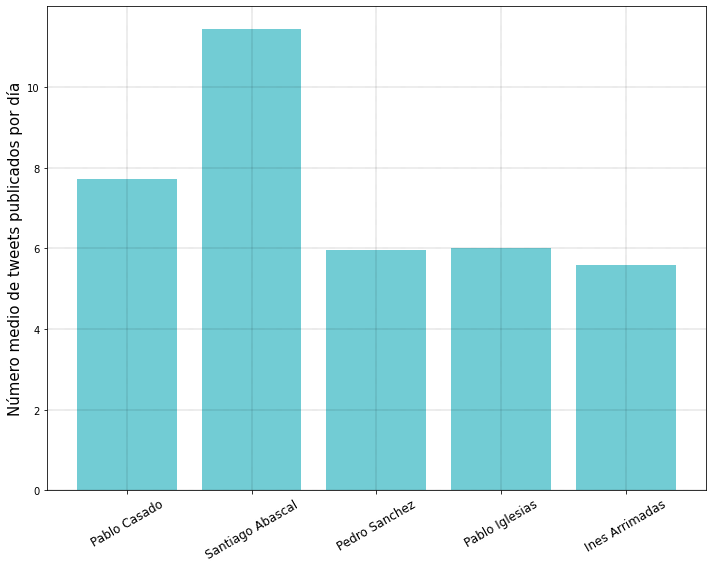

In [43]:
%matplotlib inline
plt.rcParams['figure.figsize']=(10,8)
%run Media_tweets_diarios.py

#### *Como se puede apreciar Santiago Abascal es el más activo en Twitter, en concreto escribe o retwittea unos 12 tweets de media*

<font color="#4782E4">
    
<a id="4"></a>
# 4. Word Cloud

C:\Users\rocio\Desktop\Trabajo NLP\Trabajo\EDA\gen_wordcloud.py:34: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



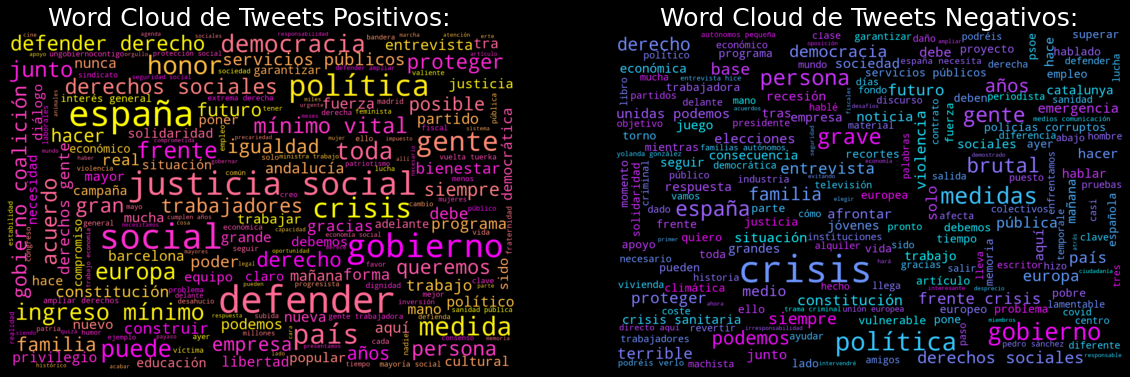

In [47]:
test_name = 'PabloIglesias'
from gen_wordcloud import gen_wordcloud
gen_wordcloud(tweet_df[test_name])

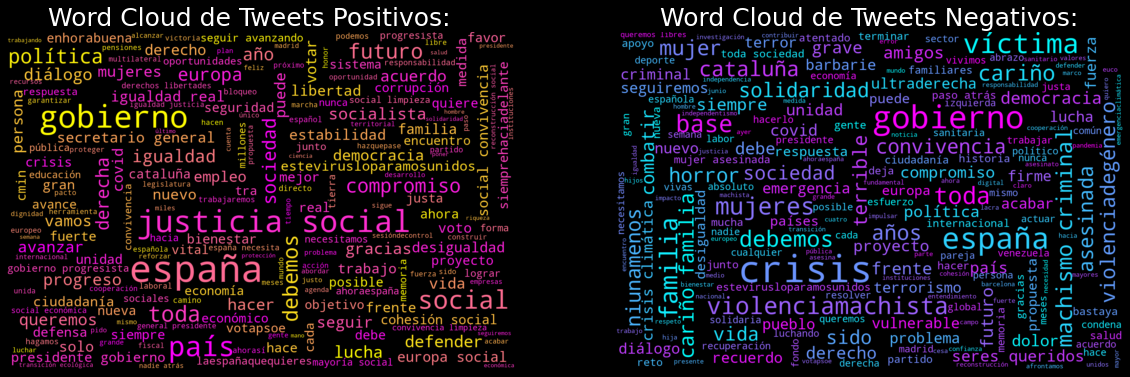

In [48]:
from gen_wordcloud import gen_wordcloud
test_name = 'sanchezcastejon'
gen_wordcloud(tweet_df[test_name])

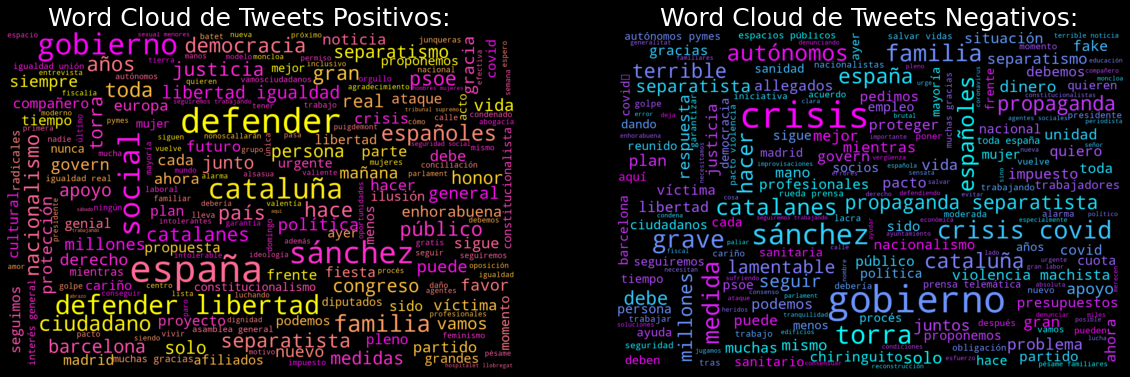

In [49]:
from gen_wordcloud import gen_wordcloud
test_name = 'InesArrimadas'
gen_wordcloud(tweet_df[test_name])

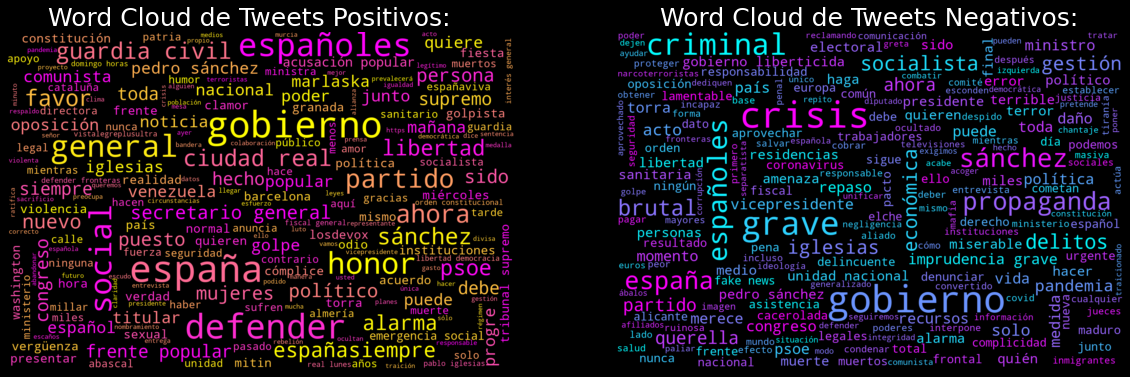

In [50]:
from gen_wordcloud import gen_wordcloud
test_name = 'Santi_ABASCAL'
gen_wordcloud(tweet_df[test_name])

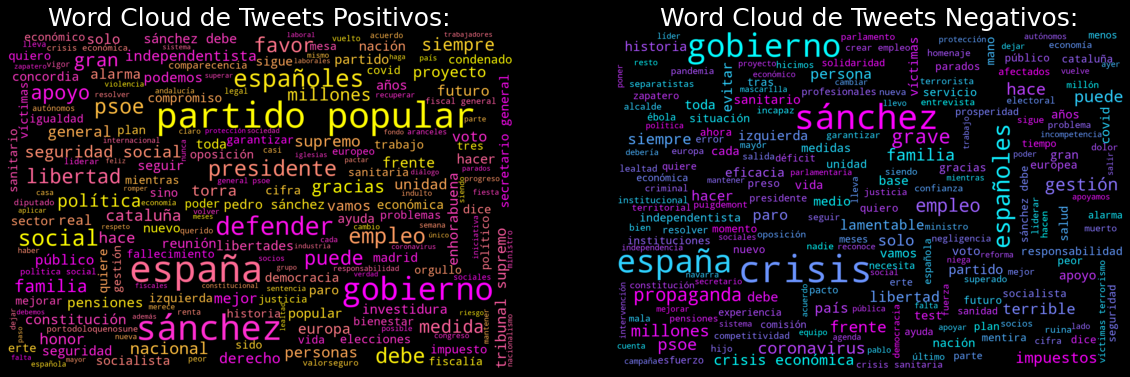

In [51]:
from gen_wordcloud import gen_wordcloud
test_name = 'pablocasado_'
gen_wordcloud(tweet_df[test_name])

#### *A través de estos gráficos se pueden extraer infinidad de conclusiones, por ejemplo una interesante es que Ines Arrimadas, Santiago Abascal y Pablo Casado coinciden en que nombran la palabra Sánchez, cuando se trata de tweets clasificados como negativos*

<font color="#4782E4">
    
<a id="5"></a>
# 5. Polaridad y Engagement

####  *Se analiza el engagement en función del nº de Retweets y Favoritos que posee un tweet, de ello depende el tamaño de la burbuja y a la vez se puede visualizar la polaridad, es decir el grado de positividad o negativismo que poseen*

In [34]:
from engagement_plot import plot_engagement
test_name = 'InesArrimadas'
eng = plot_engagement(tweet_df, test_name)
eng.bubble_chart()

In [17]:
IFrame(src='./Pablo Iglesias.html', width=1500, height=800)

In [18]:
IFrame(src='./Ines Arrimadas.html', width=1500, height=800)

In [19]:
IFrame(src='./Pablo Casado.html', width=1500, height=800)

In [27]:
IFrame(src='./Pedro Sánchez.html', width=1500, height=800)

<font color="#4782E4">

<a id="6"></a>
# 6. Correlación entre usuarios 

        1. "Correlación entre  pablocasado_ y InesArrimadas:  0.827740378209078" 
        2. "Correlación entre  sanchezcastejon y PabloIglesias:  0.713946758364983"
        3. "Correlación entre  sanchezcastejon y InesArrimadas:  0.685166391057271"
        4. "Correlación entre  sanchezcastejon y pablocasado_:  0.681392922337161"
        5. "Correlación entre  InesArrimadas y PabloIglesias:  0.678833140792714"
        6. "Correlación entre  Santi_ABASCAL y pablocasado_:  0.653505576583905"
        7. "Correlación entre  pablocasado_ y PabloIglesias:  0.624692277853074"
        8. "Correlación entre  Santi_ABASCAL y InesArrimadas:  0.620161618329841"
        9. "Correlación entre  Santi_ABASCAL y sanchezcastejon:  0.524441448183372"
        10."Correlación entre  Santi_ABASCAL y PabloIglesias:  0.519256295109918"


*Se observa como los 2 presidentes que mayor correlación poseen son Pablo Casado e Ines Arrimadas y por el contrario los 2 presidentes menos correlacionados son Santiago Abascal y Pablo Iglesias*

In [20]:
IFrame(src='./Correlación entre usuarios.html', width=1500, height=800)

<img src="Correlación tweets.png" >

<font color="#4782E4">
    
<a id="7"></a>
# 7. Modelos de clasificación de autoría

## ¿Quién escribió ese tweet Pablo Iglesias o Santiago Abascal?


La idea de este proyecto es demostrar como una máquina también puede averiguar quién ha escrito un tweet en base a los patrones de sus tweets anteriores, es obvio que a un humano si nos dan un tweet de Santiago Abascal y otro de Pablo Iglesias simplemente por el contexto sabríamos decir quién lo ha escrito con un % de acierto del 100%, pero y sí desaparecen las menciones y los hanstag y queremos adivinar si el tweet lo ha escrito Pedro Sánchez o Pablo Iglesias, tal vez en esos casos ya un humano no acertaría al 100%. 
Por todo ello he creado varios prototipos de modelos de clasificación de autoría para analizar como de eficientes podrían llegar a ser estos.


In [21]:
politicos = pd.read_excel("Politicos_original.xlsx")
politicos = politicos[['User Twitter Handle', 'Tweet']]
politicos.columns = ['usuario', 'tweet']
pd.set_option('display.max_colwidth', 300)
Santiago_Abascal = politicos[(politicos.usuario=='Santi_ABASCAL')]
Pablo_Iglesias = politicos[(politicos.usuario=='PabloIglesias')]
extremos = pd.concat([Santiago_Abascal, Pablo_Iglesias], axis=0, join='inner',sort=False)

In [22]:
print("Hay un total de {} observaciones, {} son de Santiago Abascal y {} son de Pablo Iglesias, por lo que los datos están bien balanceados".format
     (len(extremos),
     len(extremos[extremos['usuario']=='Santi_ABASCAL']),
     len(extremos[extremos['usuario']=='PabloIglesias']) ))

Hay un total de 6261 observaciones, 3224 son de Santiago Abascal y 3037 son de Pablo Iglesias, por lo que los datos están bien balanceados


<font color="#4782E4">

## Feature Engineering

Se crean 2 variables adicionales:
-  Longitud del tweet, puede ser representativo un patrón en el que una persona generalmente escriba tweets más cortos o más largos
- Número de signos de puntuación, lo cual incluye emoticonos, también puede ser relevante si un usuario generalmente usas más emoticonos que otro

In [24]:
import string
def contador_signos(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

extremos['tweet_longitud'] = extremos['tweet'].apply(lambda x: len(x) - x.count(" "))
extremos['n_signos'] = extremos['tweet'].apply(lambda x: contador_signos(x))
extremos

,usuario,tweet,tweet_longitud,n_signos
0,Santi_ABASCAL,RT @Santi_ABASCAL: ¡Delincuentes!\r\n\r\nhttps://t.co/BR6jvLeLOe https://t.co/hK92AvAfSp,81,17.3
1,Santi_ABASCAL,"Fomentando la invasión :\r\n\r\nTodas las personas que lleguen en patera tendrán derecho a cobrar la renta.\r\n\r\nMientras los españoles (y los inmigrantes legales), sin respiradores y sin cobrar los ERTEs, ... en la cola del hambre y la muerte.\r\n\r\n¡Gobierno criminal!\r\n\r\nhttps://t.co/X1...",250,6.4
2,Santi_ABASCAL,RT @vox_es: ❌ Dos doctoras de la Delegación del Gobierno admiten que el 8M disparó los contagios.\r\n\r\n❌ A las ministras se las advierte durant…,119,3.4
3,Santi_ABASCAL,¡Delincuentes!\r\n\r\nhttps://t.co/BR6jvLeLOe https://t.co/hK92AvAfSp,64,17.2
4,Santi_ABASCAL,"RT @elentirvigo: El PP retira el nombre de ""Príncipe Felipe"" a un colegio y se lo dedica a una nacionalista. \r\nHace unos días Feijóo criticó…",117,4.3
...,...,...,...,...
9349,PabloIglesias,"""En algunos aspectos, lo progresista es el nuevo sentido común"".\r\n@EnricJuliana ha hablado con @ElSiglo_eu de #NudoEspaña, el libro que hemos publicado juntos: https://t.co/tQj2eAp4my https://t.co/ecnfMd9UYG",184,10.9
9350,PabloIglesias,"Pepa Bueno me ha hecho una pregunta importante en @HoyPorHoy:\r\n""¿Cree que habrá elecciones generales en el primer trimestre de 2019?""\r\n\r\n📽 Aquí tenéis mi respuesta 👇🏽 https://t.co/TZFxZHQsLL",165,6.1
9351,PabloIglesias,"@LFLE59 @pnique @BeatrizTalegon Supongo que pensamos muy diferente, pero me identifico con tu tuit. Cuando miro a mis perros siento lo mismo. Te dejo unos versos de Neruda que te gustarán https://t.co/f68AayQuCk",180,6.1
9352,PabloIglesias,RT @SuperRoStar: Lectura obligada. 👇 Articulo muy recomendable de @Pablo_Iglesias_ en @elpais_espana https://t.co/emFGZnGGeR,112,11.6


<font color="#4782E4">
    
### Longitud de los tweets

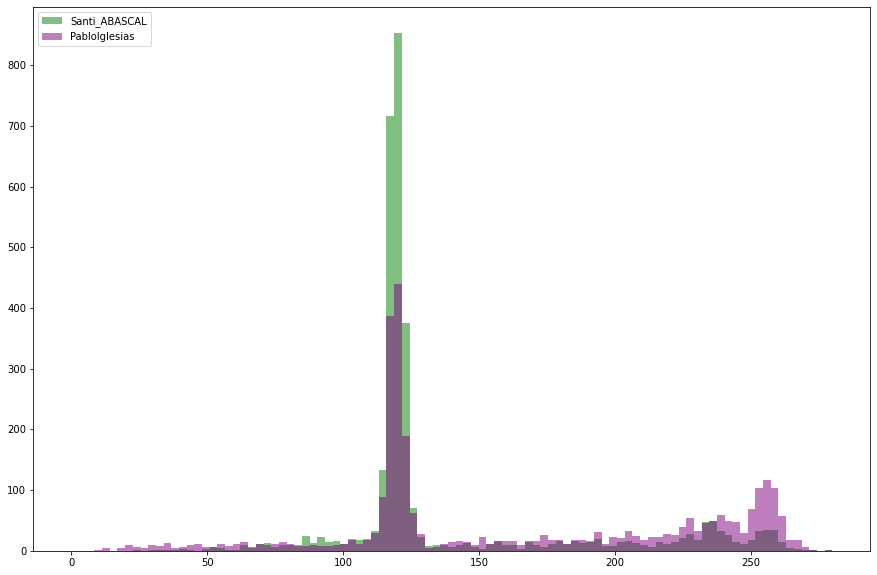

In [33]:
bins = np.linspace(0, 280, 100)
pyplot.hist(extremos[extremos['usuario']=='Santi_ABASCAL']['tweet_longitud'], bins, alpha=0.5,label='Santi_ABASCAL',  color = "green")
pyplot.hist(extremos[extremos['usuario']=='PabloIglesias']['tweet_longitud'], bins, alpha=0.5,label='PabloIglesias',  color = "purple")
pyplot.legend(loc='upper left', fontsize= 10)
pyplot.xticks(fontsize= 10)
pyplot.yticks(fontsize= 10)
pyplot.show()
pyplot.rcParams['figure.figsize']=(15,10)

<font color="#4782E4">
    
### Número de signos de puntuación usados

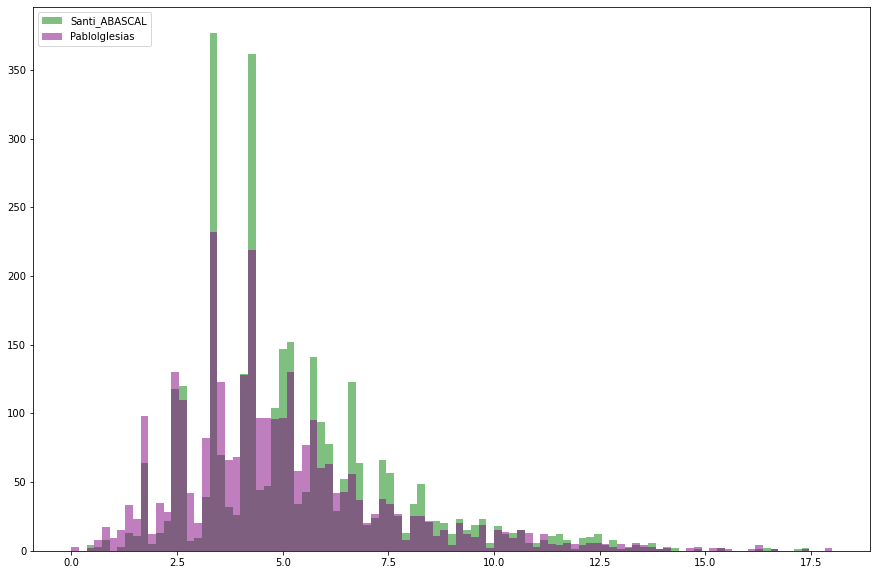

In [32]:
bins = np.linspace(0, 18, 100)
pyplot.hist(extremos[extremos['usuario']=='Santi_ABASCAL']['n_signos'], bins, alpha=0.5, label='Santi_ABASCAL',   color = "green")
pyplot.hist(extremos[extremos['usuario']=='PabloIglesias']['n_signos'], bins, alpha=0.5, label='PabloIglesias', color = "purple")
pyplot.legend(loc='upper left', fontsize= 10)
pyplot.xticks(fontsize= 10)
pyplot.yticks(fontsize= 10)
pyplot.show()
pyplot.rcParams['figure.figsize']=(15,10)

<font color="#4782E4">
    
## Prepocesamiento

In [9]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = (stopwords)

def limpiar_texto(texto):
    tokens = re.split('\W+', texto) 
    texto = [i for i in tokens if i not in stopwords] 
    extremos['tweet'] = extremos['tweet'].str.lower()
    extremos['tweet'] = extremos['tweet'].str.replace("https?://[A-Za-z0-9./]+","")
    extremos['tweet'] = extremos['tweet'].str.replace("http?://[A-Za-z0-9./]+","")
    extremos['tweet'] = extremos['tweet'].str.replace("[\.\,\!\¡\¿\?\:\;\-\=\"\'\$\%\&\()\*\+\<\>\[\\]\[\]\^\_\´\{\}\|\~\'#\(\)]", "")
    extremos['tweet'] = extremos['tweet'].str.replace("\d+", "") # nº 
    extremos['tweet'] = extremos['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    extremos['tweet'] = extremos['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
    return texto

<font color="#4782E4">
    
## Partición

In [10]:
X_train, X_test, y_train, y_test = train_test_split(extremos[['tweet', 'tweet_longitud', 'n_signos']], extremos['usuario'], test_size=0.2)
len(X_train), len(X_test)

(5008, 1253)

<font color="#4782E4">
    
# RandomForestClassifier 

<font color="#4782E4">
    
## Vectorización

<font color="#4782E4">
    
####  Selección entre TF-IDF y Count Vectorizer y búsqueda de hiperparámetros para RandomForestClassifier

In [15]:
tfidf_vect = TfidfVectorizer(analyzer=limpiar_texto)
X_tfidf = tfidf_vect.fit_transform(extremos['tweet'])
X_tfidf_feat = pd.DataFrame(X_tfidf.toarray())

count_vect = CountVectorizer(analyzer=limpiar_texto)
X_count = count_vect.fit_transform(extremos['tweet'])
X_count_feat = pd.DataFrame(X_count.toarray())

<font color="#4782E4">
    
### TF-IDF

In [18]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, extremos['usuario'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,508.898443,13.133659,2.357900,0.122970,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.768555,0.777955,0.812300,0.845048,0.799521,0.800676,0.027031,1
8,629.199835,11.185070,3.683145,0.571820,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.770152,0.773962,0.799521,0.855431,0.794728,0.798759,0.030535,2
11,601.241491,13.567608,1.565689,0.563142,None,300,"{'max_depth': None, 'n_estimators': 300}",0.761373,0.773163,0.805112,0.848243,0.803514,0.798281,0.030210,3
7,315.795753,8.026211,1.823351,0.146034,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.770152,0.777157,0.792332,0.842652,0.802716,0.797002,0.025507,4
4,263.042985,8.160794,1.668116,0.452949,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.758978,0.777955,0.802716,0.836262,0.806709,0.796524,0.026365,5


El mejor mean_test_score es 0.80

<font color="#4782E4">

### CountVectorizer

In [127]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, extremos['usuario'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,583.882787,11.218451,3.823655,1.175461,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.778931,0.772364,0.805112,0.845048,0.822684,0.804828,0.027060,1
7,276.712717,8.218665,1.610503,0.388924,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.771748,0.778754,0.807508,0.836262,0.825080,0.803870,0.025199,2
11,606.305515,13.292326,1.576019,0.580795,None,300,"{'max_depth': None, 'n_estimators': 300}",0.763767,0.777157,0.803514,0.843450,0.821086,0.801795,0.028856,3
5,420.125842,4.704667,2.384942,0.436985,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.783719,0.773962,0.803514,0.836262,0.811502,0.801792,0.021848,4
4,206.827344,3.912449,1.271410,0.195541,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.778132,0.770767,0.797125,0.850639,0.809904,0.801313,0.028266,5


El mejor mean_test_score es 0.80, es decir el resulado es muy similar al proporcionado por tf-idf. Sin embargo, el tiempo medio es superior

<font color="#4782E4">

## Se elige TF-IDF

In [12]:
tfidf_vect = TfidfVectorizer(analyzer=limpiar_texto)
tfidf_vect_fit = tfidf_vect.fit(X_train['tweet'])

tfidf_train = tfidf_vect_fit.transform(X_train['tweet'])
tfidf_test = tfidf_vect_fit.transform(X_test['tweet'])

X_train_vect = pd.concat([X_train[['tweet_longitud', 'n_signos']].reset_index(drop=True), 
               pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['tweet_longitud', 'n_signos']].reset_index(drop=True), 
              pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,tweet_longitud,n_signos,0,1,2,3,4,5,6,7,...,18534,18535,18536,18537,18538,18539,18540,18541,18542,18543
0,145,5.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,220,4.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50,8.0,0.097814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,117,2.6,0.050744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123,8.1,0.053699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
rf = RandomForestClassifier(n_estimators=300, max_depth=60, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Santi_ABASCAL', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 26.487 / Predict time: 1.645 ---- Precision: 0.847 / Recall: 0.919 / Accuracy: 0.881


In [14]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

PabloIglesias       0.92      0.85      0.88       649
Santi_ABASCAL       0.85      0.92      0.88       604

     accuracy                           0.88      1253
    macro avg       0.88      0.88      0.88      1253
 weighted avg       0.88      0.88      0.88      1253



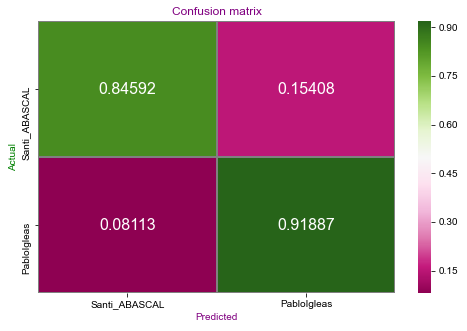

In [15]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize = (8,5))
sns.heatmap(cmn,annot = True, xticklabels= ["Santi_ABASCAL","PabloIgleas"] ,
                yticklabels= ["Santi_ABASCAL","PabloIgleas"], cmap="PiYG",linecolor = "grey",
                fmt = ".05f", linewidths = 1, annot_kws={"size": 16})
plt.title("Confusion matrix", color="purple")
plt.xlabel('Predicted', color="purple")
plt.ylabel('Actual', color="green")
sns.set(font_scale=5.4)
plt.show()

- *Nota: para llevar a cabo la creación del modelo de clasificación se han probado otros modelos pero para simplificar el notebook solamente se adjunta el definitivo.
    Por ejemplo GradientBoostingClassifier arroja resultados similares, sin embargo al ser iterativo el tiempo de computo es casi el triple al anterior*

<font color="#4782E4">


## Modelo de clasificación multiclase

<font color="#4782E4">
    
### Análisis de unigramas y bigramas

In [114]:
politicos = pd.read_excel("Politicoscontweetslimpios.xlsx")
politicos['id_usuario']=politicos['usuario'].factorize()[0]
pd.set_option('display.max_colwidth', 300)
category_id_df = politicos[['usuario', 'id_usuario']].drop_duplicates().sort_values ('id_usuario') 
category_to_id = dict(category_id_df .values) 
id_to_category = dict(category_id_df[['id_usuario','usuario']].values) 
stopwords = nltk.corpus.stopwords.words('spanish')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords)
features = tfidf.fit_transform(politicos.Tweet).toarray()
labels = politicos.id_usuario
N = 2
for usuario, id_usuario in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == id_usuario)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("________{}________:".format(usuario))
  print("Unigramas más correlacionados:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("Bigramas más correlacionados:\n. {}".format('\n. '.join(bigrams[-N:])))

________InesArrimadas________:
Unigramas más correlacionados:
. separatismo
. govern
Bigramas más correlacionados:
. millones catalanes
. muchas gracias
________PabloIglesias________:
Unigramas más correlacionados:
. tuerka
. gente
Bigramas más correlacionados:
. unidas podemos
. derechos sociales
________Santi_ABASCAL________:
Unigramas más correlacionados:
. españaviva
. españasiempre
Bigramas más correlacionados:
. sánchez iglesias
. santiago abascal
________pablocasado_________:
Unigramas más correlacionados:
. popular
. sánchez
Bigramas más correlacionados:
. directo clausura
. partido popular
________sanchezcastejon________:
Unigramas más correlacionados:
. rueda
. directo
Bigramas más correlacionados:
. presidente gobierno
. directo rueda


In [72]:
X_train, X_test, y_train, y_test = train_test_split(politicos['Tweet'], politicos['usuario'], test_size=0.2 , random_state = 22)
len(X_train), len(X_test)

(12491, 3123)

In [73]:
vectorizer = CountVectorizer(stop_words=stopwords)

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'tfidf__sublinear_tf': (True, False),  
}

#Pipeline
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
     ])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, scoring= "accuracy")
grid_search.fit(X_train, y_train)

print(classification_report(y_test, grid_search.predict(X_test)))

                 precision    recall  f1-score   support

  InesArrimadas       0.68      0.61      0.64       618
  PabloIglesias       0.77      0.68      0.72       602
  Santi_ABASCAL       0.78      0.76      0.77       624
   pablocasado_       0.65      0.70      0.68       667
sanchezcastejon       0.74      0.86      0.80       612

       accuracy                           0.72      3123
      macro avg       0.73      0.72      0.72      3123
   weighted avg       0.72      0.72      0.72      3123



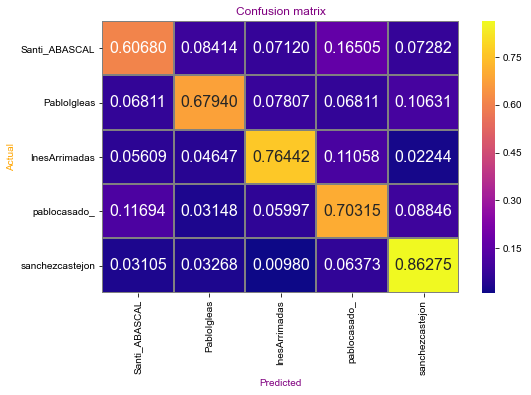

In [47]:
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize = (8,5))
sns.heatmap(cmn,annot = True, xticklabels= ["Santi_ABASCAL","PabloIgleas", "InesArrimadas", "pablocasado_", "sanchezcastejon"] ,
                yticklabels= ["Santi_ABASCAL","PabloIgleas", "InesArrimadas", "pablocasado_", "sanchezcastejon"], cmap="plasma",linecolor = "grey",
                fmt = ".05f", linewidths = 1, annot_kws={"size": 16})
plt.title("Confusion matrix", color="purple")
plt.xlabel('Predicted', color="purple")
plt.ylabel('Actual', color="orange")
sns.set(font_scale=5.4)
plt.show()

<font color="#4782E4">

## *Comprobación tweets día 10 de Junio*

<blockquote class="twitter-tweet"><p lang="es" dir="ltr">Sánchez tiene la peor gestión económica, que el Banco de España agrava con un 15% caída PIB y 25% de paro. La OCDE dice que seremos los más afectados de la zona euro y Eurostat que en el 1er trimestre nuestro país destruyó 10 veces más empleo que la media UE ¿Salimos más fuertes? <a href="https://t.co/zjrbWmvb4L">pic.twitter.com/zjrbWmvb4L</a></p>&mdash; Pablo Casado Blanco (@pablocasado_) <a href="https://twitter.com/pablocasado_/status/1270749825299025927?ref_src=twsrc%5Etfw">June 10, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [74]:
grid_search.predict(["Sánchez tiene la peor gestión económica, que el Banco de España agrava con un 15% de caída PIB y el 25% de paro. Según la OCDE nuestra economía será la más afectada de la zona euro y Eurostat sostiene que nuestro país lidera la destrucción de empleo. ¿Esto es salir más fuertes?"])

array(['pablocasado_'], dtype='<U15')

<blockquote class="twitter-tweet"><p lang="es" dir="ltr">Hoy defendemos en el Congreso el <a href="https://twitter.com/hashtag/IngresoVital?src=hash&amp;ref_src=twsrc%5Etfw">#IngresoVital</a>, que ayudará a llenar la nevera a millones de compatriotas y que es clave para una reconstrucción económica justa y eficaz. Hasta el Fondo Monetario Internacional aplaude la medida. Mientras, la derecha española le llama &quot;paguita&quot;. <a href="https://t.co/XEpxQQpW9M">pic.twitter.com/XEpxQQpW9M</a></p>&mdash; Pablo Iglesias 🔻 (@PabloIglesias) <a href="https://twitter.com/PabloIglesias/status/1270697123907080193?ref_src=twsrc%5Etfw">June 10, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [75]:
grid_search.predict(["Hoy defendemos en el Congreso el #IngresoVital, que ayudará a llenar la nevera a millones de compatriotas y que es clave para una reconstrucción económica justa y eficaz. Hasta el Fondo Monetario Internacional aplaude la medida. Mientras, la derecha española le llama paguita."])

array(['sanchezcastejon'], dtype='<U15')

*Este modelo simplemente es un prototipo, para mejorarlo se podrían llevar a cabo técnicas como Feature Engineering (como se hace en el anterior modelo), también técnicas de Stemming o Lemmatizing y lo más importante de todo utilizar una base de datos mucho más amplia y utilizar modelos de Redes Neuronales*

*Como es previsible cuando tiene que clasificar entre más de 2 categorías le cuesta mucho más y por ello en promedio se consigue un acierto de un 73% que en principio no es muy bueno, pero es aceptable para prototipar. Además, se pone un ejemplo el cual es incapaz de reconocer y falla*

*De igual manera que con la clasificación binaria se han probado más modelos y se dejan en este notebook únicamente los que arrojan mejores resultados*


<font color="#4782E4">

<a id="8"></a>
# 8. Topic Modeling de Pedro Sánchez

In [116]:
pd.set_option('display.max_colwidth', 500)
Pedro_Sanchez = pd.read_excel("Politicos_tweets_limpios.xlsx")
Pedro_Sanchez = Pedro_Sanchez[(Pedro_Sanchez.usuario=='sanchezcastejon')]
Pedro_Sanchez = Pedro_Sanchez[['Tweet']]
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(Pedro_Sanchez['Tweet']).toarray()
tf_feature_names = vectorizer.get_feature_names()
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic nº%d palabras" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic nº%d pesos" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic nº0 palabras,Topic nº0 pesos,Topic nº1 palabras,Topic nº1 pesos,Topic nº2 palabras,Topic nº2 pesos,Topic nº3 palabras,Topic nº3 pesos,Topic nº4 palabras,Topic nº4 pesos,Topic nº5 palabras,Topic nº5 pesos,Topic nº6 palabras,Topic nº6 pesos,Topic nº7 palabras,Topic nº7 pesos,Topic nº8 palabras,Topic nº8 pesos,Topic nº9 palabras,Topic nº9 pesos
0,gobierno,254.9,centro,65.0,gobierno,117.0,españa,110.6,españa,256.7,crisis,48.4,españa,123.4,directo,336.6,gobierno,312.4,cariño,114.1
1,presidente,234.1,coordinación,59.1,españa,101.0,social,99.3,país,164.2,españa,44.8,europa,119.3,prensa,192.3,españa,127.0,familia,112.1
2,directo,144.0,mujeres,54.2,cmin,76.6,votapsoe,84.6,futuro,111.5,españoles,42.4,mundo,71.8,rueda,188.3,cataluña,93.1,gracias,92.3
3,enhorabuena,81.1,emergencias,50.1,social,75.2,justicia,79.9,democracia,101.6,españolas,39.1,lucha,66.2,partir,123.8,progresista,87.7,toda,81.5
4,funciones,74.1,director,47.1,personas,74.3,derecha,66.0,seguir,89.9,economía,37.7,compromiso,64.4,junto,113.7,convivencia,70.6,solidaridad,69.5
5,tras,65.2,salud,43.5,política,70.7,votar,60.2,queremos,84.8,país,31.5,transición,60.1,ministro,110.1,ahora,64.0,mujer,69.1
6,general,48.8,hombres,42.9,medidas,56.4,futuro,60.1,derechos,75.3,camino,29.0,encuentro,48.9,minutos,90.1,psoe,60.2,sociedad,66.2
7,deporte,42.0,fernando,42.8,diálogo,53.5,voto,60.1,avanzando,67.2,frenar,28.0,justa,45.6,aquí,83.1,fuerte,55.5,violenciamachista,64.1
8,consejo,39.8,sanitarias,38.1,empleo,51.5,vamos,56.1,igualdad,66.2,actuar,27.8,ecológica,43.1,gobierno,67.3,país,54.7,víctimas,62.1
9,comparecencia,37.1,simón,37.1,nuevo,48.4,cada,53.1,todas,65.3,brexit,25.9,agenda,41.1,portavoz,67.1,bloqueo,51.3,apoyo,60.1


#### *Se aprecia como por ejemplo el Topic nº 1 habla de temas relacionados con emergencias, fernando, simón o por ejemplo el topic nº 9 de mujeres familia y cariño*

<font color="#4782E4">

<a id="9"></a>
# 9. Clustering 

Se lleva a cabo con tweets desde el día 1 Octubre de 2020.

In [2]:
politicos = pd.read_excel("Tweetsdesdeoctubre.xlsx")
politicos.dropna(inplace=True)

Una vez están correctamente pre procesados los tweets se vectorizan

In [3]:
def vectorizar(texto):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texto)
    return X

text = politicos['Tweet_limpio'].values
X = vectorizar(text, )
X.shape

(9018, 18546)

Se reduce la dimensión a través de PCA

In [4]:
pca = PCA(n_components=0.95, random_state=55)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(9018, 5765)

Se examina el nº óptimo de clusters a establecer

In [5]:
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

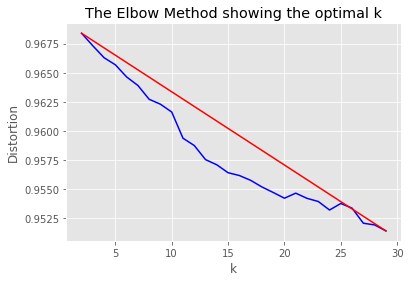

In [6]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
k = 13
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
y_pred = kmeans.fit_predict(X_reduced)
politicos['y'] = y_pred

In [8]:
tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9018 samples in 45.227s...
[t-SNE] Computed neighbors for 9018 samples in 2641.953s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9018
[t-SNE] Computed conditional probabilities for sample 2000 / 9018
[t-SNE] Computed conditional probabilities for sample 3000 / 9018
[t-SNE] Computed conditional probabilities for sample 4000 / 9018
[t-SNE] Computed conditional probabilities for sample 5000 / 9018
[t-SNE] Computed conditional probabilities for sample 6000 / 9018
[t-SNE] Computed conditional probabilities for sample 7000 / 9018
[t-SNE] Computed conditional probabilities for sample 8000 / 9018
[t-SNE] Computed conditional probabilities for sample 9000 / 9018
[t-SNE] Computed conditional probabilities for sample 9018 / 9018
[t-SNE] Mean sigma: 0.295473
[t-SNE] KL divergence after 50 iterations with early exaggeration: 81.775955
[t-SNE] KL divergence after 1000 iterations: 3.148364


<font color="#4782E4">
    
### Topics de los clusters

In [24]:
vectorizers = []

for i in range(0, 13):
    vectorizers.append(CountVectorizer())
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(politicos.loc[politicos['y'] == current_cluster, 'Tweet_limpio']))
    except Exception as e:
        print("Error, no hay suficientes instancias en el cluster: " + str(current_cluster))
        vectorized_data.append(None)

numero_topics_cluster = 10

lda_models = []
for i in range(0, 13):
    lda = LatentDirichletAllocation(n_components=numero_topics_cluster, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)

clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))
        
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for i in keywords:
        return_values.append(i[0])
    return return_values

all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [25]:
all_keywords

[['presidente',
  'directo',
  'gobierno',
  'venezuela',
  'endirecto',
  'partido',
  'reunión',
  'entrevista',
  'españa',
  'comienza',
  'emergencia',
  'clausura',
  'frente',
  'apoyarle',
  'sesióndecontrol',
  'partidos',
  'pon'],
 ['españa',
  'gobierno',
  'necesita',
  'europa',
  'país',
  'partido',
  'madrid',
  'familias',
  'pasado',
  'millones',
  'plaza',
  'democracia',
  'psoe',
  'gran',
  'ministros',
  'bildu',
  'permitido',
  'macron',
  'grosera'],
 ['directo',
  'partir',
  'aquí',
  'interviene',
  'congreso',
  'gobierno',
  'atiende',
  'tras',
  'junto',
  'debate',
  'elda',
  'azul',
  'ahoragobierno',
  'compañeros',
  'media',
  'aqui',
  'compañeras',
  'plaza',
  'sociales',
  'ferreras'],
 ['iglesias',
  'gobierno',
  'pablo',
  'españa',
  'sánchez',
  'pedro',
  'fiscalía',
  'hace',
  'amenaza',
  'política',
  'todavía',
  'verdad',
  'labor',
  'funcione',
  'vital',
  'bruselas',
  'exige',
  'garantizar',
  'cambios',
  'andalu'],
 ['gob

<font color="#4782E4">
    
### Análisis de la capacidad de generalización

In [35]:
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")
    
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=55, n_jobs=-1)

sgd_clf.fit(X_train, y_train)

sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  95.148 %
     Precision:  95.565 %
        Recall:  92.618 %
      F1 score:  94.016 %


In [36]:
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)
classification_report("Stochastic Gradient Descent Report (Testing Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Testing Set) :

Accuracy Score:  87.306 %
     Precision:  90.918 %
        Recall:  79.962 %
      F1 score:  84.558 %


In [34]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 95.576 %


<font color="#4782E4">

### Plot interactivo

In [79]:
output_notebook()
y_labels = y_pred

source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    usuario= politicos['usuario'],
    Tweet = politicos['Tweet'],
    labels = ["Cluster nº. " + str(x) for x in y_labels],
    ))

hover = HoverTool(tooltips=[("Usuario", "@usuario{safe}"),("Tweet", "@Tweet{safe}"),], point_policy="follow_mouse")

initial_palette = Set3[12] 

mapper = linear_cmap(field_name='desc', 
                     palette=Set3[12],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
plot = figure(plot_width=1000, plot_height=650, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset', 'save', 'tap'], 
           title="Clustering tweets presidentes politicos", 
           toolbar_location="above")

plot.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_width=1.1,
          line_color="steelblue",
          legend  = 'labels')
plot.legend.background_fill_alpha = 0.6

Loading BokehJS ...

In [ ]:
plot = layout([[plot]])
plot.sizing_mode = "scale_both"

output_file('Clustering_tweets.html')
show(plot)

In [37]:
from IPython.display import IFrame
IFrame(src='./Clustering_tweets.html', width=1500, height=800)